# Assignment 2 - Classification

$\textbf{NAME : CHAITANYA DARADE}$

# Introduction

### Objective and approach : 

This assignment aims to classify wine quality dataset into two different classes using four different approaches or methods, comparing their results by calculating and comparing their performance using different accuracy measures such as Confusion matrix, Evaluation metrics, Precision, Specificity, Recall, etc and visualizing the results on different plots.

The methods/algorithms used to classify the dataset as below:

#### 1 : Pocket Algorithm
#### 2 : Quadratic discriminant analysis(QDA)
#### 3 : Linear discriminant analysis(LDA)
#### 4 : Logistic Regression

# Data: Description

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.

* File information : 

winequality-red2.csv
winequality-white2.csv

(12994*14)

* Attribute Information:

For more information
Input variables (based on physicochemical tests):

1 : fixed acidity  
    Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and       succinic acids)
    
2 : volatile acidity
    These acids are to be distilled out from the wine before completing the production process.
    
3 : citric acid
    This is one of the fixed acids which gives a wine its freshness.
    
4 : residual sugar
    This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is     stopped.
    
5 : chlorides
    This is usually a major contributor to saltiness in wine.
    
6 : free sulfur dioxide
    This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part         binds
    
7 : total sulfur dioxide
    This is the sum total of the bound and the free sulfur dioxide
    This is mainly added to kill harmful bacteria and preserve quality and freshness. 
    
8 : density
    This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of         water.It is generally used as a measure of the conversion of sugar to alcohol. 
    
9 : pH
    Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine.
    
10: sulphates
    These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of     the winemaking around the world and are considered essential.
    
11: alcohol
    Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation       process. The percentage of alcohol can vary from wine to wine.
    
12: quality (score between 0 and 10)
    Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is     the median of at least three evaluations made by the same wine experts.
    
Additional two features are added :
    First is to determine type of wine and second is to determine wine quality.
    
13: wine_type
    Type of wine(red or white)
    
14: wine_quality(Classification feature)
    Quality of the wine(low or mediun or high)
    
Source : https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Data - Plots for understanding and Preliminary observation

## Reading the Data

Both data files(winequality-red2.csv, winequality-white2.csv) are read with pandas dataframes and concatenated into
single one.

It's shape and info is being displayed after merging them in preprossessing section.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, classification_report

In [2]:
red_wine_data = pd.read_csv('winequality-red2.csv',sep=',')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine_data = pd.read_csv('winequality-white2.csv',sep=',')
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Preprocessing of the Data

In preprocessing activity, Additional two features are added : First is to determine type of wine and second is to determine wine quality.
Then both datasets are concatenated into single dataframe

Quality is being classified in two classes i.e 'low' and 'high'

In [4]:
red_wine_data['wine_type'] = 'red'
red_wine_data['wine_quality'] = red_wine_data['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'high')
red_wine_data['wine_quality'] = pd.Categorical(red_wine_data['wine_quality'], 
                                           categories=['low','high'])
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [5]:
white_wine_data['wine_type'] = 'white'
white_wine_data['wine_quality'] = white_wine_data['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'high' )

white_wine_data['wine_quality'] = pd.Categorical(white_wine_data['wine_quality'], 
                                             categories=['low', 'high'])
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,high
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,high
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,high
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,high
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,high


In [6]:
wine_data=pd.concat([red_wine_data,white_wine_data])
wine_data = wine_data.sample(frac=1, random_state=95).reset_index(drop=True)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,red,low
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,white,low
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,white,high
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,white,high
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,white,low


In [7]:
le = preprocessing.LabelEncoder()
wine_data['wine_quality'] = le.fit_transform(wine_data['wine_quality']) 
wine_data['wine_type'] = le.fit_transform(wine_data['wine_type']) 
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,0,1
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,1,1
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1,0
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,1,0
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,1,1


In [8]:
wine_data.shape


(12994, 14)

In [9]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,0,1
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,1,1
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1,0
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,1,0
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,1,1


In [10]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 14 columns):
fixed acidity           12994 non-null float64
volatile acidity        12994 non-null float64
citric acid             12994 non-null float64
residual sugar          12994 non-null float64
chlorides               12994 non-null float64
free sulfur dioxide     12994 non-null float64
total sulfur dioxide    12994 non-null float64
density                 12994 non-null float64
pH                      12994 non-null float64
sulphates               12994 non-null float64
alcohol                 12994 non-null float64
quality                 12994 non-null int64
wine_type               12994 non-null int64
wine_quality            12994 non-null int64
dtypes: float64(11), int64(3)
memory usage: 1.4 MB


## Visualization of the Data and Preliminary obervations

In [11]:
data_cols = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine_data[data_cols].describe(),2)
ws = round(white_wine_data[data_cols].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Stats', 'White Wine Stats'])

Red Wine Stats                                                           \
      residual sugar total sulfur dioxide sulphates  alcohol volatile acidity   
count        3198.00              3198.00   3198.00  3198.00          3198.00   
mean            2.54                46.47      0.66    10.42             0.53   
std             1.41                32.89      0.17     1.07             0.18   
min             0.90                 6.00      0.33     8.40             0.12   
25%             1.90                22.00      0.55     9.50             0.39   
50%             2.20                38.00      0.62    10.20             0.52   
75%             2.60                62.00      0.73    11.10             0.64   
max            15.50               289.00      2.00    14.90             1.58   

               White Wine Stats                                          \
       quality   residual sugar total sulfur dioxide sulphates  alcohol   
count  3198.00          9796.00              9796.00   9796.00  9796.00   
mean      5.64             6.39               138.36      0.49    10.51   
std       0.81             5.07                42.50      0.11     1.23   
min       3.00             0.60                 9.00      0.22     8.00   
25%       5.00             1.70               108.00      0.41     9.50   
50%       6.00             5.20               134.00      0.47    10.40   
75%       6.00             9.90               167.00      0.55    11.40   
max       8.00            65.80               440.00      1.08    14.20   

                                 
      volatile acidity  quality  
count          9796.00  9796.00  
mean              0.28     5.88  
std               0.10     0.89  
min               0.08     3.00  
25%               0.21     5.00  
50%               0.26     6.00  
75%               0.32     6.00  
max               1.10     9.00

In [12]:
wines_corr = wine_data.corr()
round(wines_corr,2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08,-0.49,0.07
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27,-0.65,0.27
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09,0.19,-0.08
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04,0.35,0.03
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20,-0.51,0.18
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06,0.47,-0.04
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04,0.70,0.05
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31,-0.39,0.27
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02,-0.33,-0.02
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04,-0.49,-0.04


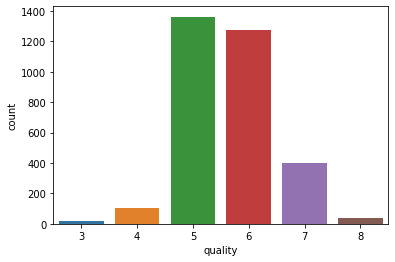

In [13]:
ax = sns.countplot(x=red_wine_data.quality, data=red_wine_data)

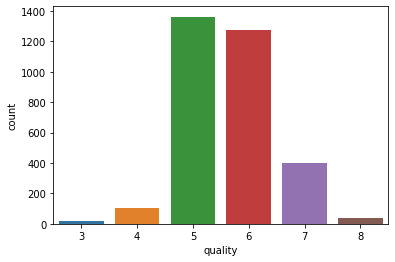

In [14]:
ax = sns.countplot(x=red_wine_data.quality, data=white_wine_data)

### Obeservation:

According to the data description, quality is a score between 0 to 10. But we can see that red and white wine doesn't have any values in the low and high extreme ends of the scale 0 to 10. In addition we can also see that the quality rating are kind of normally distributed with large ditribution in the center of the scale around 5 and 6 and flatenning out in the ends. The normal distibution of the quality is true because there is will be few top wines in the market and then followed by bunch of medium quality wines and then the lower ends.


Is the quality of wine depends on the alcohol level in the wine? This is a interesting problem to anwser. So lets dive in.

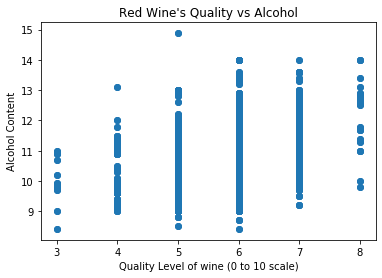

In [15]:
plt.scatter(x = red_wine_data.quality, y = red_wine_data.alcohol, marker='o')
plt.title("Red Wine's Quality vs Alcohol")
plt.xlabel("Quality Level of wine (0 to 10 scale)")
plt.ylabel("Alcohol Content")
plt.show()

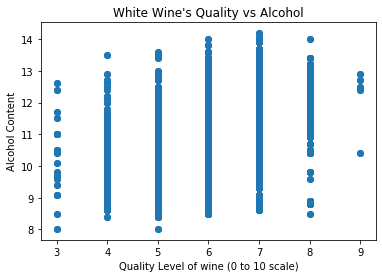

In [16]:
plt.scatter(x = white_wine_data.quality, y = white_wine_data.alcohol, marker='o')
plt.title("White Wine's Quality vs Alcohol")
plt.xlabel("Quality Level of wine (0 to 10 scale)")
plt.ylabel("Alcohol Content")
plt.show()

### Obeservation

When we look at the red and white wine's alcohol content we can see some increasing trend from the lower quality rating to the high quality rating. This shows that quality is depend on the alcohol content in the wine. But how much does the quality depends on the Alcohol content. In order to answer that question, we will try to address the all the rlation between the the variables in our dataset using correlation and heatmaps.

In [17]:
def confusion_matrix_plot(data, title = "Red Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()

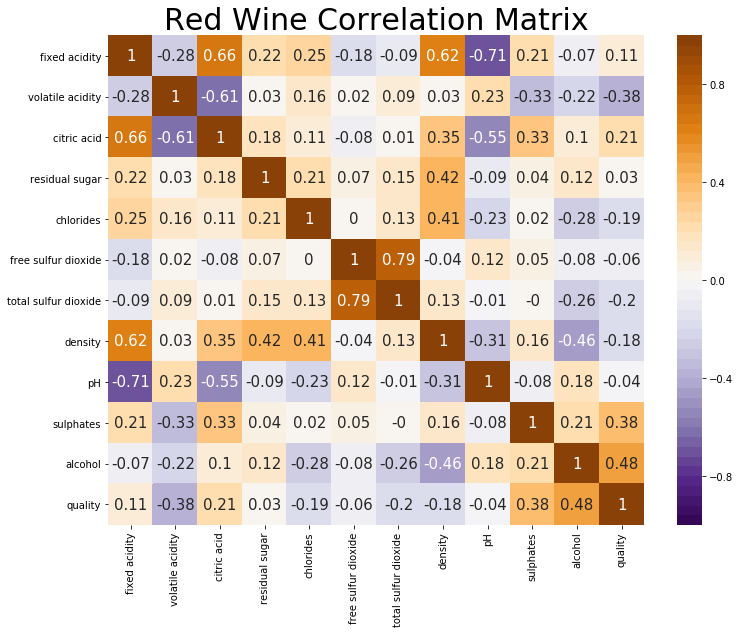

In [18]:
# Call the confusion matrix function
confusion_matrix_plot(red_wine_data, title = "Red Wine Correlation Matrix")

Heatmap shows the correlation between the variables in the dataset. High concentration of color representation high corrlation. Brown represents positive and purple represents negative correlation.

From the above heatmap on the red wine, we have the following inference

1 : It looks like we have pH and fixed acidity has inverse relationships between them. The same in case of citric acid and volatile acidity too.

2 : There is a strong positive relationship between total sulfur dioxide and free sulfur dioxide.

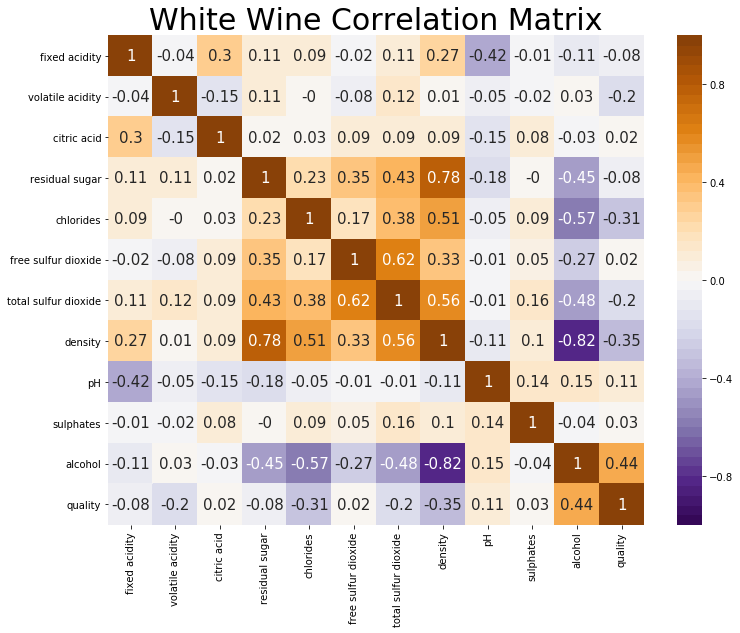

In [19]:
confusion_matrix_plot(white_wine_data, title = "White Wine Correlation Matrix")

From the above white wine heatmap, we have the following inferences:
1 : We see that low density contents are high on alcohol content

2 : Sugar content in the wine might represents the wine density

3 : Just like red wine, here also total and free sulfur dioxide are related together

Now that we have seen much about the predictors lets see the responding varaible quality and how it is related to the predictors. We see the quality is more depend on the folowwing from both red and white wines

### Positive relation (Increase in this will increase the quality)

* ${Alcohol}$:

* ${Sulphates}$:

### Positive relation (Increase in this will decrease the quality)

* ${Density}$:

* ${Volatile acidity}$:

* ${Chlorides}$:

In [20]:
wine_data['wine_quality'] = wine_data['wine_quality'].apply(lambda value: 1 if value == 0 else -1 )

In [21]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,0,-1
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,1,-1
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1,1
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,1,1
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,1,-1


# Summary of Classification models

### Pocket algorithm:

The Perceptron Learning Algorithm is one of the simplest machine learning algorithms and a crucial building block of more complex machine learning and deep learning models. A simple modification of this algorithm is termed the Pocket Learning Algorithm.
The idea is straightforward: this algorithm keeps the best result seen so far in its pocket (that is why it is called Pocket Learning Algorithm). The best result means the number of misclassification is minimum. If the new weights produce a smaller number of misclassification than the weights in the pocket, then replace the weights in the pocket to the new weights; if the new weights are not better than the one in the pocket, keep the one in the pocket and discard the new weights. At the end of the training iteration, the algorithm returns the solution in the pocket, rather than the last solution.

<br>
$$w(k+1)=w(k)+α(t_{i})(x_{i})$$

where α is learning rate
<br> <br>

The model is implemented using a Pocket class which inherits the base class and overrides the train and use methods. A compare method is added to the class which compares the results of the previous weights and the new weights.

<br> <br>

### QDA

Discriminant analysis is used to determine which variables discriminate between two or more naturally occurring groups, it may have a descriptive or a predictive objective. This operator performs a quadratic discriminant analysis (QDA). QDA is closely related to linear discriminant analysis (LDA), where it is assumed that the measurements are normally distributed. Unlike LDA however, in QDA there is no assumption that the covariance of each of the classes is identical. To estimate the parameters required in quadratic discrimination more computation and data is required than in the case of linear discrimination. If there is not a great difference in the group covariance matrices, then the latter will perform as well as quadratic discrimination. Quadratic Discrimination is the general form of Bayesian discrimination. Discriminant Analysis may be used for two objectives: either we want to assess the adequacy of classification, given the group memberships of the objects under study; or we wish to assign objects to one of several (known) groups of objects

From the observation that both terms have the same cosmetics, we can define the discriminant function $\delta_k(xv)$ as

$$
\delta_k(xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{xv}$, the label can be predicted with

$$
y = \arg\max_k \delta_k(\tilde{xv}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 


### LDA 

Linear Discriminant Analysis is a dimensionality reduction technique used as a preprocessing step in Machine Learning and pattern classification applications. The main goal of dimensionality reduction techniques is to reduce the dimensions by removing the redundant and dependent features by transforming the features from higher dimensional space to a space with lower dimensions. Linear Discriminant Analysis is a supervised classification technique that considers labels.

This can be achieved in three steps :
The first step is to calculate the separability between different classes(i.e the distance between the mean of different classes) also called between-class variance. Second Step is to calculate the distance between the mean and sample of each class, which is called the within-class variance. The third step is to construct the lower-dimensional space which maximizes the between-class variance and minimizes the within-class variance.

<br><br>
LDA makes predictions by calculating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class. <br> <br>

$$
 \delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

<br>
 In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
 \boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$

### Logistic Regression 

Logistic Regression is used when the dependent variable(target) is categorical.
For example:
To predict whether an email is spam (1) or (0)
Whether the tumor is malignant (1) or not (0)
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

Decision boundary
Our current prediction function returns a probability score between 0 and 1. To map this to a discrete class (true/false, cat/dog), we select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 2.

𝑝≥0.5,𝑐𝑙𝑎𝑠𝑠=1
𝑝<0.5,𝑐𝑙𝑎𝑠𝑠=0

 <br> <br> 
 
 $$
 wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
 $$
 
 Converting the summation into matrix calculation,
 
 $$
 wv_j \leftarrow wv_j + \alpha Xm^\top \Big(  t_{*,j} - g_j(Xm)\Big).
 $$

## A. Super Classs Definition

In [22]:
from abc import ABC, abstractmethod
# Super class for machine learning models

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod 
    def use(self, X):
        pass

class Classifier(BaseModel): 
    """
        Abstract class for classification
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """
    def __init__(self, ): 
        self.meanX = None 
        self.stdX = None
        
    def normalize(self, X):
        """ standardize the input X """
        if not isinstance(X, np.ndarray): 
            X = np.asanyarray(X)
        
        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX 
        return Xs
    
    def _check_matrix(self, mat, name): 
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
            
    # add a basis
    def add_ones(self, X): 
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))
    #################################################### 
    #### abstract funcitons ############################ 
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod 
    def use(self, X):
        pass                                                                                                                                                                               

## Explanation of code

BaseModel class has two abstract methods train() and use(). Any class that extends this BaseModel class has to provide implementation for these abstract methods. Classifier class extends BaseModel class with functions again abstract. Classifier class provides three concrete methods normalize(), check_matrix(), add_ones(). check_matrix() checks if passed argument is 2D matrix or not, if it is not, then it raises the value error. add_ones() checks whether the matrix is 2D or not and if it is, it adds a column of 1s at the beginning of the matrix. normalize function standardize the input by calculating mean and standard deviation.

In [23]:
def partition(X, T, ratio=[0.80, 0.20]): 
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [24]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,0,-1
1,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,4,1,-1
2,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,1,1
3,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,7,1,1
4,6.5,0.14,0.33,7.6,0.050,53.0,189.0,0.99660,3.25,0.49,8.6,5,1,-1
5,6.7,0.32,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7,0,1
6,6.6,0.23,0.18,8.5,0.044,59.0,188.0,0.99558,3.16,0.49,9.5,5,1,-1
7,6.6,0.25,0.31,1.5,0.035,32.0,127.0,0.99210,3.41,0.47,11.3,6,1,1
8,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
9,6.9,0.19,0.35,1.7,0.036,33.0,101.0,0.99315,3.21,0.54,10.8,7,1,1


## Explanation of code

Partition function is introduced/defined to split dataset into train and test data in a ratio of 80% to 20% respectively. This function takes independent and dependent dataframes as inputs, and randomly divide it into 80:20 ratio. Returned list of dataframes then splitted into X_Train, X_Test, y_Train, y_Test dataframes accordingly.  

## B. POCKET ALGORITHM

In [25]:
from copy import deepcopy as copy 

class Pocket(Classifier):
    def __init__(self):
        self.maxiter=10
        self.alpha=0.1 
        self.w=None 
        self.w_pocket=None
      
    @staticmethod
    def compare(X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T): 
       # set_trace()
        N=X.shape[0]
        self.w = np.zeros(X.shape[1]) 
        self.w_pocket=copy(self.w) 
        print(self.w_pocket)
        for i in range(self.maxiter):
            converged = True 
            for k in range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]

            if converged: 
                #set_trace()
                print("converged at ", i) 
                break      
        print("End of training: ", i)
        print(self.w_pocket)    
        
    def use(self, X):
        return np.sign(X @ self.w_pocket)

## Explanation of code

1. Pocket algorithm above is child class of Super class Classifier. 
2. It will implement all the abstract method of its super class.
3. It has two function train and use. 
4. Train function will train the data. Also, maxiter means maximum number of iteration. So it means maximum number of times training of data will occur. 
5. use function will use the test data to predict the value. 
6. Initial weight w is set to zero then the weight is copied to w_pocket which is nothing but the pocket that stores the best weight seen so far. 
7. It will replace the value if weights with better value is seen and replace and keep it in the w_pocket. 
8. compare function is used to compare weights

## C. QDA

In [26]:
from copy import deepcopy as copy 
class QDA1(Classifier):
    
    def __init__(self):
        Classifier.__init__(self) 
        self.mu1=None 
        self.Sigma1=None 
        self.Sigma2=None 
        self.d1=None
        self.d2=None 
        self.p1=None 
        self.mu2=None 
        self.p2=None
        
    @staticmethod
    def QDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        sub = np.asarray(X - mu)
        return -0.5 * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(sub @ sigma_inv * sub, axis=1) + np.log(p)
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns) 
        new_df['wine_quality']=t
        X1=new_df[new_df.wine_quality == -1.0]
        X1=X1.drop(['wine_quality'],axis=1)
        X2=new_df[new_df.wine_quality == 1.0]
        X2=X2.drop(['wine_quality'],axis=1)
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
        
    def use(self,X):
        Xtest=self.normalize(X) 
        self.d1,self.d2=self.QDAfunc(Xtest,np.matrix(self.mu1),self.Sigma1,self.p1),self.QDAfunc(Xtest,np.matrix(self.mu2),self.Sigma2,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2    

# Explanation of code
 
1. QDA algorithm above is child class of Super class Classifier.
2. Hence it will implement the abstract methods. 
3. QDAfunc function is used to calculate the discriminant value for each class.
4. train function takes X,T as input where X is train data and T is target variables of train data.
5. mu1 and mu2 are mean
6. N1 and N2 are used to store the status rows in it.
7. So that we can calculate probability based upon number of rows of a particular class. For example, we have two class 1 and -1. We store all rows of class=1 in N1 and all rows of class=-1 in N2. 
8. Now we calculate probability by N1/N1+N2 where N1= number of rows of class=1 and N1+N2= total number of rows for both class. Similarly, we will calculate probability for both the classes. 
9. We store these probabilities in variables p1 and p2. 
10. Sigma1 and Sigma2 stores the covariance for X1(class=1) and X2(class=2)
11. use function will evaluate d1 and d2 by calling QDAfunc and then checking the greater value and assigning the class -1 and 1 accordingly and returns prediction and d1,d2. 

## D. LDA

In [27]:
class LDA1(Classifier):
    
    def __init__(self): 
        Classifier.__init__(self) 
        self.mu1=None 
        self.Sigma1=None 
        self.d1=None
        self.d2=None 
        self.p1=None 
        self.mu2=None 
        self.p2=None
                    
    @staticmethod
    def LDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(p), axis=1)

    def train(self,X_train,t):        
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns) 
        new_df['wine_quality']=t
        X1=new_df[new_df.wine_quality == -1.0]
        X1=X1.drop(['wine_quality'],axis=1)
        X2=new_df[new_df.wine_quality == 1.0]
        X2=X2.drop(['wine_quality'],axis=1)
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))
        self.Sigma = np.cov(tt.T)
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
    
    def use(self,X):
        Xtest=self.normalize(X) 
        self.d1,self.d2=self.LDAfunc(Xtest,self.mu1,self.Sigma,self.p1),self.LDAfunc(Xtest,self.mu2,self.Sigma,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

# Explanation of code
 
1. LDA algorithm above is child class of Super class Classifier.
2. Hence it will implement the abstract methods. 
3. LDAfunc function is used to calculate the discriminant value.
4. train function takes X,T as input where X is train data and T is target variables of train data.
5. mu1 and mu2 are mean
6. N1 and N2 are used to store the status rows in it.
7. So that we can calculate probability based upon number of rows of a particular class. For example, we have two class 1 and -1. We store all rows of class=1 in N1 and all rows of class=-1 in N2. 
8. Now we calculate probability by N1/N1+N2 where N1= number of rows of class=1 and N1+N2= total number of rows for both class. Similarly, we will calculate probability for both the classes. 
9. We store these probabilities in variables p1 and p2. 
10. use function will evaluate d1 and d2 by calling LDAfunc and then checking the greater value and assigning the class -1 and 1 accordingly and returns prediction and d1,d2. 

## E. Logistic Regression

In [28]:
class Logistic(Classifier):
    
    def __init__(self,alpha): 
        Classifier.__init__(self) 
        self.w = None
        self.alpha = alpha
    
    def sigmoidfunc(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z)
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))    

    def g(self,X, w):
        return self.sigmoidfunc(X @ w)

    def train(self, X, T):
        X = self.normalize(X)
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
    
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys)
        
    def use(self, X):
        Xs = self.normalize(X) 
        Xs = self.add_ones(Xs) 
        return self.g(Xs, self.w)

# Explanation of code
 
1. Logistic regression algorithm above is child class of Super class Classifier.
2. Hence it will implement the abstract methods. It has train and use function  
3. Train function will takes input matrices X and T.
4. It calculates values of D and K. D=number of features, K = number of unique classes in T
5. use() function takes test data X as input. 
6. It normalizes it and add ones column to X. 
7. It  calculates output variable using sigmoid function on dot product of Xs and weights matrix.
8. Sigmoidfunc generalizes sigmoid function 

# Experiments

## 1. Pocket Algorithm

In [29]:
#X_Dataframe = wine_data.drop(['wine_quality'],axis=1)
#y_Dataframe = wine_data['wine_quality']
X_Dataframe= wine_data[['total sulfur dioxide','alcohol','quality']]
y_Dataframe = wine_data['wine_quality']

In [30]:
Xlst, Tlst = partition(pd.DataFrame(X_Dataframe[5:1000]), pd.DataFrame(y_Dataframe[5:1000]))

In [31]:
X_train, X_test = [xx.values for xx in Xlst]
T_train, T_test = [tt.values for tt in Tlst]

In [32]:
X_train.shape

(796, 3)

In [33]:
X_test.shape

(199, 3)

In [34]:
T_train.shape

(796, 1)

In [35]:
T_test.shape

(199, 1)

In [36]:
from sklearn.preprocessing import StandardScaler 
from sklearn import model_selection
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=np.array(T_train)
y_test=np.array(T_test)

In [37]:
p=Pocket()
p.train(X_train,y_train)
# Prediction on train set
ypred_train=p.use(X_train)
# Prediction on test set
ypred_p=p.use(X_test)

[0. 0. 0.]
converged at  2
End of training:  2
[ 0.04268812 -0.01585063  0.69017342]


### Plotting (Prediction vs Test data)

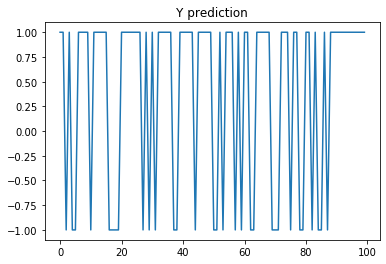

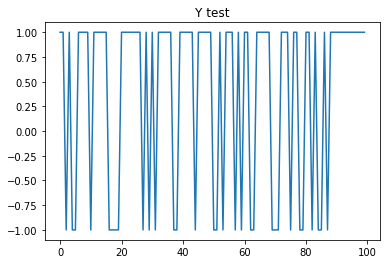

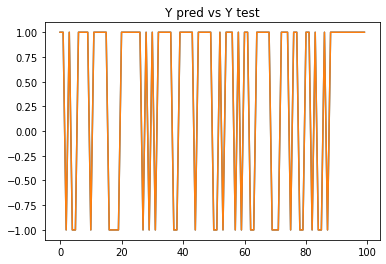

In [38]:
plt.title("Y prediction")
plt.plot(ypred_p[0:100])
plt.show()
plt.title("Y test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_p[0:100])
plt.plot(y_test[0:100])
plt.show()

### Accuracy, F1 of trained data

In [39]:
print('Accuracy:', accuracy_score(y_train,ypred_train))
print('F1 score:', f1_score(y_train,ypred_train))

Accuracy: 1.0
F1 score: 1.0


### Confusion matrix of test data

In [40]:
cf=confusion_matrix(y_test, ypred_p)
cf

array([[ 75,   0],
       [  0, 124]])

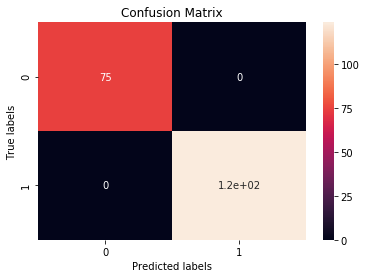

In [41]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

### Evaluation metrics

In [42]:
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

#### Precision

In [43]:
precision=(TP/(TP+FP))
precision

1.0

#### Specificity

In [44]:
specificity=TN/(TN+FP)
specificity

1.0

#### Recall

In [45]:
recall=TP/(TP+FN)
recall

1.0

### Accuracy, F1 of test data

In [46]:
print('Accuracy:', accuracy_score(y_test,ypred_p))
print('F1 score:', f1_score(y_test,ypred_p))

Accuracy: 1.0
F1 score: 1.0


### ROC AUC Score

In [47]:
roc_auc_score(y_test, ypred_p)

1.0

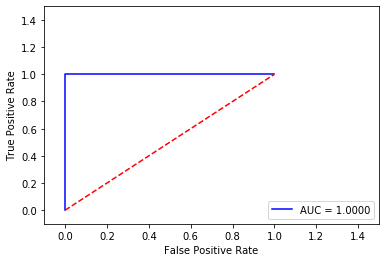

In [48]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_p)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right') 
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. QDA

In [49]:
X_Dataframe= wine_data[['total sulfur dioxide','alcohol','quality']]
y_Dataframe = wine_data['wine_quality']

In [50]:
Xlst, Tlst = partition(pd.DataFrame(X_Dataframe), pd.DataFrame(y_Dataframe))

In [51]:
X_train, X_test = [xx.values for xx in Xlst]
T_train, T_test = [tt.values for tt in Tlst]

In [52]:
X_train.shape

(10395, 3)

In [53]:
X_test.shape

(2599, 3)

In [54]:
T_train.shape

(10395, 1)

In [55]:
T_test.shape

(2599, 1)

In [56]:
X_train = pd.DataFrame(X_train,columns=X_Dataframe.columns)
X_test = pd.DataFrame(X_test,columns=X_Dataframe.columns)
y_train = pd.DataFrame(T_train,columns=y_Dataframe.to_frame().columns)
y_test = pd.DataFrame(T_test,columns=y_Dataframe.to_frame().columns)

In [57]:
q=QDA1()
q.train(X_train,y_train)

In [58]:
ypred_qda_train,d1,d2=q.use(X_train)

In [59]:
ypred_qda_test,d1,d2=q.use(X_test)

### Plotting ( Prediction vs Test data)

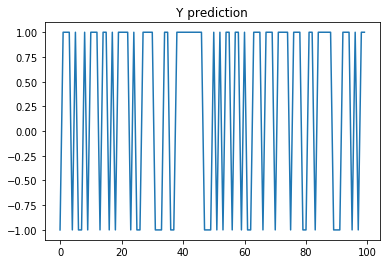

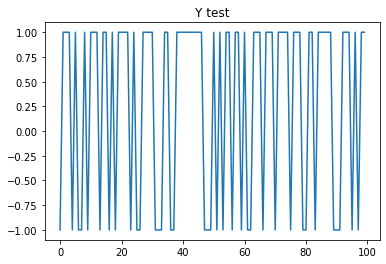

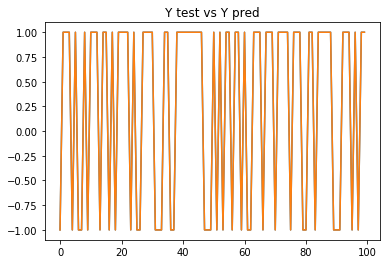

In [60]:
plt.title("Y prediction")
plt.plot(ypred_qda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(ypred_qda_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

### Accuracy, F1 train data

In [61]:
print('Accuracy:', accuracy_score(y_train,ypred_qda_train))
print('F1 score:', f1_score(y_train,ypred_qda_train))

Accuracy: 0.9976911976911977
F1 score: 0.9981785063752276


### Confusion matrix test data

In [62]:
cf=confusion_matrix(y_test, ypred_qda_test)
cf

array([[ 942,    7],
       [   0, 1650]])

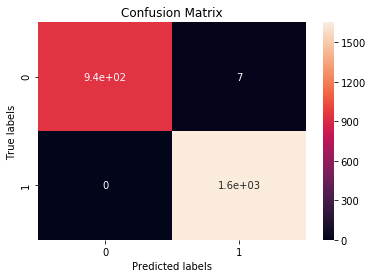

In [63]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

### Evaluation metrics

In [64]:
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

#### Precision

In [65]:
precision=(TP/(TP+FP))
precision

0.995775497887749

#### specificity

In [66]:
specificity=TN/(TN+FP)
specificity

0.9926238145416227

#### Recall 

In [67]:
recall=TP/(TP+FN)
recall

1.0

### Accuracy, F1 on Test data

In [68]:
print('Accuracy:', accuracy_score(y_test,ypred_qda_test))
print('F1 score:', f1_score(y_test,ypred_qda_test))

Accuracy: 0.9973066564063101
F1 score: 0.9978832778953736


### ROC AUC Score

In [69]:
roc_auc_score(y_test, ypred_qda_test)

0.9963119072708113

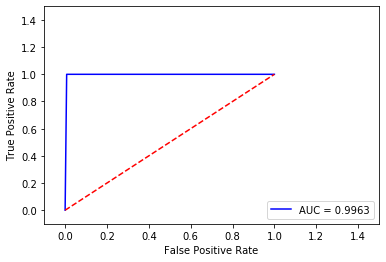

In [70]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_qda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right') 
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### QDA Discriminant function 3D plot

Text(0.5, 0.92, 'QDA Discriminant Functions')

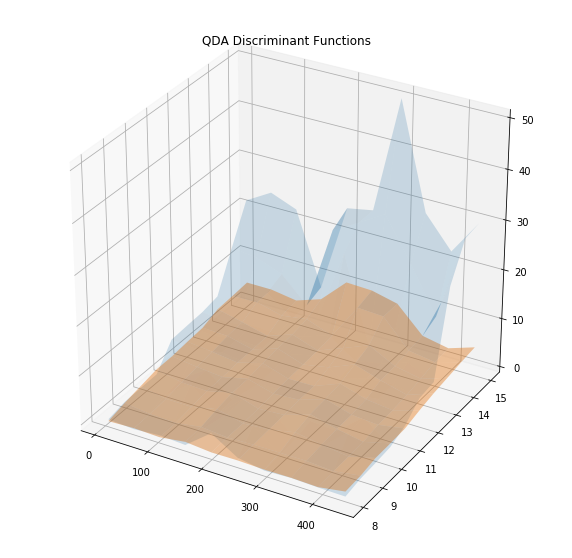

In [71]:
p,d1_p,d2_p = q.use(X_test[:100])                                  #predicted
xs, ys = np.meshgrid(np.linspace(6,440, 10), np.linspace(8,15, 10))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

Text(0.5, 0.92, 'QDA Discriminant Functions')

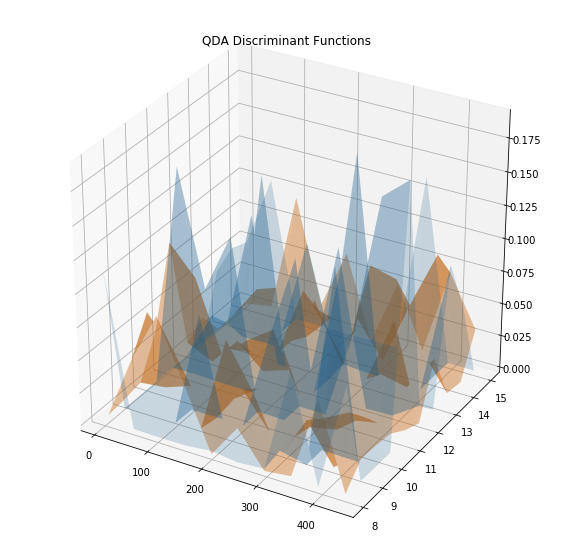

In [72]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p1
))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p2
))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)
plt.title("QDA Discriminant Functions")

## Obeservation :

To understand the QDA plot, only the first 100 samples are plotted.
Graph shows the probabilities of two classes i.e High-quality wine and Low-quality wine.
Axis ranges are given according to the features we provided to classify wine-quality feature.

As we observed before, as the alcohol level increases, the quality of wine also increases as they are positively correlated. Here the graph shows the same. The high-quality class (shown in color blue), have comparatively higher probabilities than that of low-quality(shown in orange color), as we move along x2 axis i.e alcohol axis.

### Decision Boundary

Text(0.5, 1.0, 'Decision Boundary')

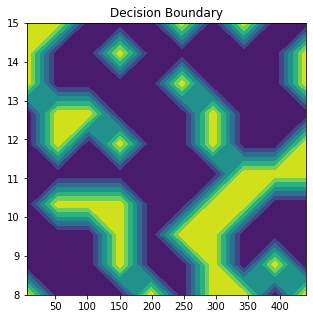

In [73]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## 3. LDA

In [74]:
X_Dataframe= wine_data[['total sulfur dioxide','alcohol','quality']]
y_Dataframe = wine_data['wine_quality']

In [75]:
Xlst, Tlst = partition(pd.DataFrame(X_Dataframe), pd.DataFrame(y_Dataframe))

In [76]:
X_train, X_test = [xx.values for xx in Xlst]
T_train, T_test = [tt.values for tt in Tlst]

In [77]:
X_train.shape

(10395, 3)

In [78]:
X_test.shape

(2599, 3)

In [79]:
T_train.shape

(10395, 1)

In [80]:

T_test.shape

(2599, 1)

In [81]:
X_train = pd.DataFrame(X_train,columns=X_Dataframe.columns)
X_test = pd.DataFrame(X_test,columns=X_Dataframe.columns)
y_train = pd.DataFrame(T_train,columns=y_Dataframe.to_frame().columns)
y_test = pd.DataFrame(T_test,columns=y_Dataframe.to_frame().columns)

In [82]:
l=LDA1()
l.train(X_train,y_train)

In [83]:
ypred_lda_train,d1,d2=l.use(X_train)

In [84]:
ypred_lda_test,d1,d2=l.use(X_test)

### Plotting ( Prediction vs Test data)

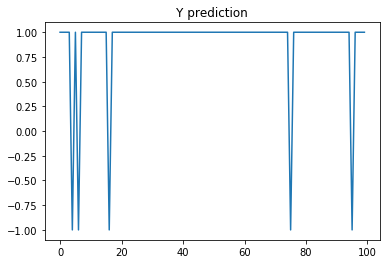

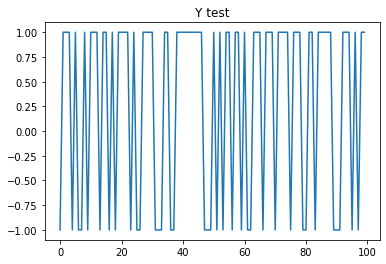

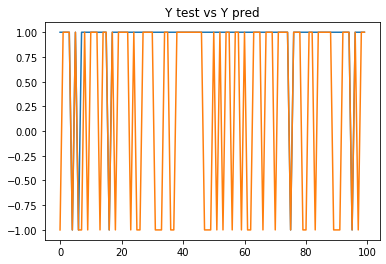

In [85]:
plt.title("Y prediction")
plt.plot(ypred_lda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(ypred_lda_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

### Accuracy, F1 score on train data

In [86]:
print('Accuracy:', accuracy_score(y_train,ypred_lda_train))
print('F1 score:', f1_score(y_train,ypred_lda_train))

Accuracy: 0.6711880711880712
F1 score: 0.7937235968617984


### Confusion matrix

In [87]:
cf=confusion_matrix(y_test, ypred_lda_test)
cf

array([[  91,  858],
       [   0, 1650]])

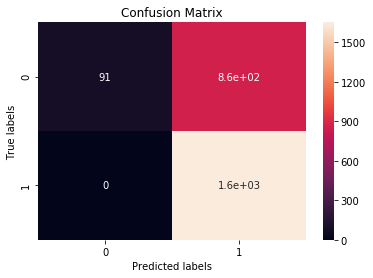

In [88]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

### Evaluation metrics

In [89]:
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

#### Precision 

In [90]:
precision=(TP/(TP+FP))
precision

0.6578947368421053

#### Specificity

In [91]:
specificity=TN/(TN+FP)
specificity

0.0958904109589041

#### Recall

In [92]:
recall=TP/(TP+FN)
recall

1.0

### Accuracy, F1 on Test data

In [93]:
print('Accuracy:', accuracy_score(y_test,ypred_lda_test))
print('F1 score:', f1_score(y_test,ypred_lda_test))

Accuracy: 0.6698730280877261
F1 score: 0.7936507936507937


### ROC AUC Score

In [94]:
roc_auc_score(y_test, ypred_lda_test)

0.547945205479452

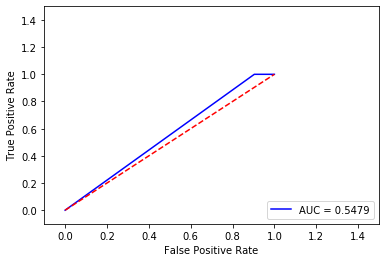

In [95]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right') 
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LDA Discriminant function 3D plot

Text(0.5, 0.92, 'LDA Discriminant Functions')

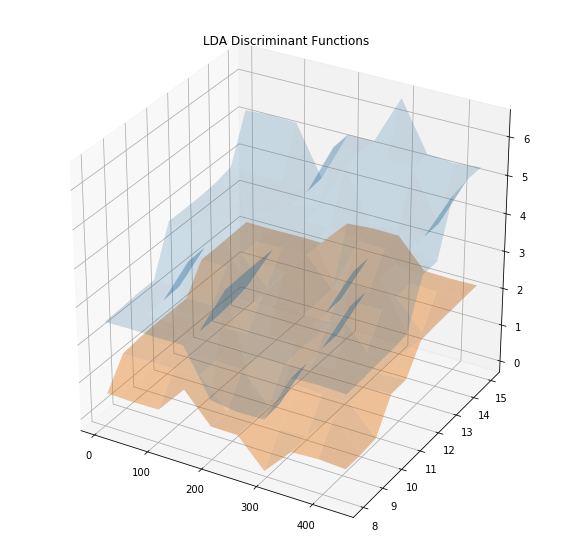

In [96]:
p,d1_p,d2_p = l.use(X_test[:100])                                  #predicted
xs, ys = np.meshgrid(np.linspace(6,440, 10), np.linspace(8,15, 10))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 0.92, 'LDA Discriminant Functions')

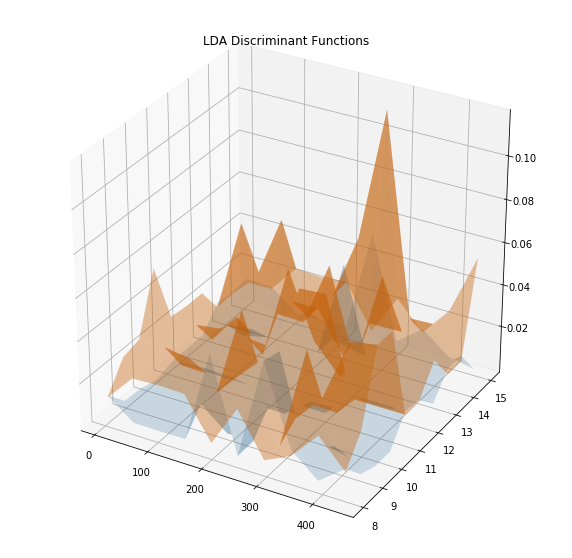

In [97]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p1
))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p2
))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)
plt.title("LDA Discriminant Functions")

### Decision Boundary

Text(0.5, 1.0, 'Decision Boundary')

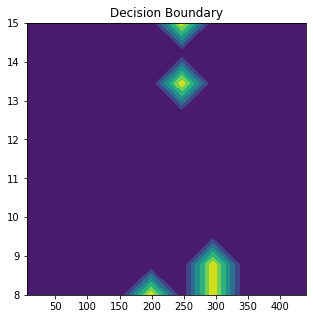

In [98]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## 4. Logistic Regression

In [99]:
X_Dataframe= wine_data[['total sulfur dioxide','alcohol','quality']]
y_Dataframe = wine_data['wine_quality']

In [100]:
Xlst, Tlst = partition(pd.DataFrame(X_Dataframe), pd.DataFrame(y_Dataframe))

In [101]:
X_train, X_test = [xx.values for xx in Xlst]
T_train, T_test = [tt.values for tt in Tlst]

In [102]:
X_train.shape

(10395, 3)

In [103]:
X_test.shape

(2599, 3)

In [104]:
T_train.shape

(10395, 1)

In [105]:
T_test.shape

(2599, 1)

In [106]:
XTrain = pd.DataFrame(X_train,columns=X_Dataframe.columns)
XTest = pd.DataFrame(X_test,columns=X_Dataframe.columns)
YTrain = pd.DataFrame(T_train,columns=y_Dataframe.to_frame().columns)
YTest = pd.DataFrame(T_test,columns=y_Dataframe.to_frame().columns)

In [107]:
lr = Logistic(0.0001)
lr.train(XTrain[:],np.array(YTrain[:]))

In [108]:
ypred_lr_train = lr.use(XTrain[:])
ypred_lr_train = np.argmax(ypred_lr_train, 1)
y_train=np.array(YTrain)
y_train=np.where(YTrain==-1,0,1)

In [109]:
ypred_lr_test = lr.use(XTest[:])
ypred_lr_test = np.argmax(ypred_lr_test, 1)
y_test=np.array(YTest)
y_test=np.where(YTest==-1,0,1)

### Plotting ( Prediction vs Test data)

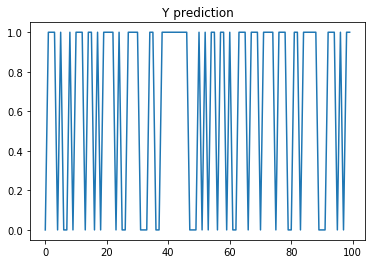

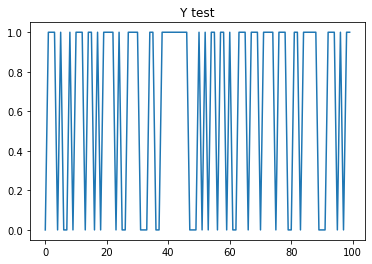

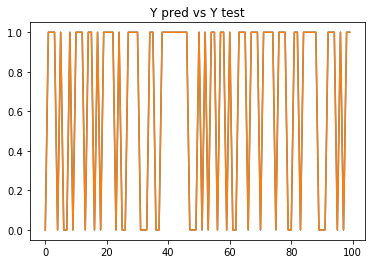

In [110]:
plt.title("Y prediction")
plt.plot(ypred_lr_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_lr_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

### Accuracy, F1 on train data

In [111]:
print('Accuracy:', accuracy_score(y_train, ypred_lr_train))
print('F1 score:', f1_score(y_train, ypred_lr_train))

Accuracy: 0.9998075998075998
F1 score: 0.9998479549946785


### Confusion matrix

In [112]:
cf=confusion_matrix(y_test, ypred_lr_test)
cf

array([[ 949,    0],
       [   0, 1650]])

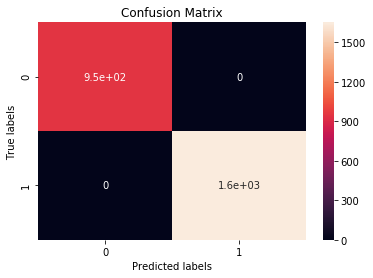

In [113]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

### Evaluation metrics

In [114]:
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

#### Precision   

In [115]:
precision=(TP/(TP+FP))
precision

1.0

#### Specificity

In [116]:
specificity=TN/(TN+FP)
specificity

1.0

#### Recall

In [117]:
recall=TP/(TP+FN)
recall

1.0

### Accuracy, F1 on test data

In [118]:
print('Accuracy:', accuracy_score(y_test,ypred_lr_test))
print('F1 score:', f1_score(y_test,ypred_lr_test))

Accuracy: 1.0
F1 score: 1.0


### ROC AUC Score

In [119]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve, auc
roc_auc_score(y_test, ypred_lr_test)

1.0

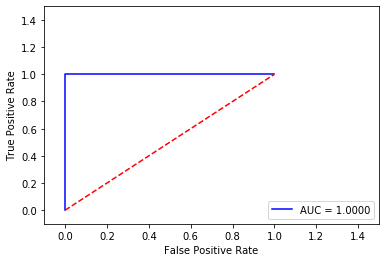

In [120]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lr_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right') 
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Discussion about evaluation metrics

### Confusion matrix: 

A confusion matrix is a summary of prediction results on a classification problem.The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

Definition of the Terms:

• $\textbf {Positive} (P) $: Observation is positive 

• $\textbf {Negative} (N) $: Observation is not positive

• $\textbf {True Positive} (TP) $: : Observation is positive, and is predicted to be positive.

• $\textbf {False Negative} (FP) $ : Observation is positive, but is predicted negative.

• $\textbf {True Negative} (TN) $ : Observation is negative, and is predicted to be negative.

• $\textbf {False Positive} (FP) $ : Observation is negative, but is predicted positive.


### Precision, Recall and Specificity 
$\textbf {Precision} $: 
    To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples.     
    
$${precision}={TP}/{(TP+FP)}$$


$\textbf {Recall (Sensitivity or True Positive Rate)} $:
    To get the value of Recall we divide the total number of correctly classified positive examples divide to the total number of positive examples. 
    
    
$${recall}={TP}/{(TP+FN)}$$    

$\textbf {Specificity (True Negative Rate)} $:
    To get the value of Specificity we divide the total number of correctly classified negative examples divide to the total number of negative examples.
    
$${specificity}={TN}/{(TN+FP)}$$    

### Accuracy
   To get the value of Accuracy we divide the total number of correctly classified positive and negative examples divide to the total number of examples.

$${Accuracy}={TP + TN}/{(P + N)}$$ 


### F1 Score
   F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more and F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).
   
$${F-measure}={(2*recall*precision)}/{(recall + precision)}$$   


### AUC-ROC Curve

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.
It uses TPR (True Positive Rate) / Recall /Sensitivity, Specificity, FPR(1-Specificity) to measure performance of the model.

# Discussion about Train and Test accuracies

## Pocket Algorithm 


### Trained data

${Accuracy} $: 1.0

${F1 score} $: 1.0


### Test data

${Precision} $: 1.0

${Specificity} $: 1.0

${Recall} $: 1.0

${Accuracy} $: 1.0

${F1 score} $: 1.0

${ROC-AUC Score} $: 1.0


Pocket algorithm gave correctly classified the training dataset with 100% accuracy, and it stays constant with testing data as well with 100% accuracy. So weights are correctly converged and used to classify data accurately.
From the above results, we can say that our model is working excellently both on train data and test data. It's working similarily on both the data without any overfitting. The model doesn't underfit as it is achieving good results.
 

### QDA 

### Trained data

${Accuracy} $: 0.9976911976911977

${F1 score} $: 0.9981785063752276


### Test data

${Precision} $: 0.995775497887749

${Specificity} $: 0.9926238145416227

${Recall} $: 1.0

${Accuracy} $: 0.9973066564063101

${F1 score} $: 0.9978832778953736

${ROC AUC Score} $: 0.9963119072708113


QDA performed exceptionally well with the F1 score above 99%  for both train and test data. Moreover, other performance measures like accuracy and ROC AUC Score also exceeds 99% measure.

### LDA 

### Trained data

${Accuracy} $: 0.6711880711880712

${F1 score} $: 0.7937235968617984


### Test data

${Precision} $: 0.6578947368421053

${Specificity} $: 0.0958904109589041

${Recall} $: 1.0

${Accuracy} $: 0.6698730280877261

${F1 score} $: 0.7936507936507937

${ROC AUC Score} $: 0.547945205479452


It seems, LDA failed in classifying negative class, i.e it has more false-positive values which resulted in a low precision rate i.e 65.78%, however, it correctly classified for positive class resulted in 100% recall.

Performance-wise it doesn't match the QDA, however, F1 score around 80% for both train and test data seems satisfactory.

### Logistic Regression


### Trained data

${Accuracy} $: 0.9998075998075998

${F1 score} $: 0.9998479549946785


### Test data

${Precision} $: 1.0

${Specificity} $: 1.0

${Recall} $: 1.0

${Accuracy} $: 1.0

${F1 score} $: 1.0

${ROC AUC Score} $: 1.0

Logistic regression performed exceptionally better than QDA and LDA. Just like pocket algorithm, it has 100% accuracy and F1 score for both train and test data.

# Discussions about Classification model comparision

From the above results, we can see that the Pocket and logistic regression algorithm are achieving better results compared to other models considering AUC score, F1 score, as F1 score is a right measure to calculate performance. Similarly, the AUC score is also used for evaluation. The third best would be QDA considering AUC score, F1 score. And the last would be LDA. Looks like the LDA model was not able to accurately predict the negative class since it has low precision. For LDR, the threshold is considered is low, so more false negatives. Increasing the threshold would increase its performance by decreasing false positives. Meanwhile, for other algorithms, this threshold is being set pretty accurately, results in a high RUC score. Pocket algorithm performed ex as excellently, i.e weights are correctly converged and used to classify data accurately as it correctly classified the training dataset with 100% accuracy, and it stays constant with testing data as well i.e 100% accuracy. It's working similarily on both the data without any overfitting achieving good results.

Performance measure parameters for differnent methods on a test data as below:

${Pocket} $ <br> 

Precision: 1.0 <br>
Specificity: 1.0 <br>
Recall: 1.0<br>


${QDA} $ <br> 

Precision: 0.995775497887749<br>
Specificity: 0.9926238145416227<br>
Recall: 1.0<br>


${LDA} $ <br>

Precision: 0.6578947368421053<br>
Specificity:  0.0958904109589041<br>
Recall:  1.0<br>


${Logistic Regession} $ <br> 

Precision:  1.0<br>
Specificity:  1.0<br>
Recall:  1.0<br>

# Conclusion

Looking at the overall performance, I think the Pocket and Logistic regression models have performed very well in comparison with other models. They achieved very good evaluation scores considering AUC score, as F1 and AUC are the right measures for the ultimate evaluation. LDA would have been performed better if the threshold was being set to some higher value, many false positives would have been decreased, however, it tried to maintain a good F1-score at the end, though it's not that accurate performance-wise. 

This assignment helped me in understanding different performance measures in-depth, I could distinguish their importance under different algorithms/methods. I learned that how F1-score is so important though the accuracy seems pretty high for some models, and one may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost the same. Therefore, you have to look at other parameters to evaluate the performance of your model such as the F1 score. F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have a similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

Also, I was able to understand the working of QDA and LDA models more clearly with coding and understanding the math behind these models. This assignment helped me evaluate a model based on their evaluation metrics which gives us a better view of how a model is performing.

# References

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez , "Wine Quality Data Set", https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

Aurélien Géron, "Hands on Machine learning with scikit learn and Tensorflow", O'Reilly Media, 2017 https://icenamor.github.io/files/books/Hands-on-Machine-Learning-with-Scikit-2E.pdf

Classification Class Note
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.ipynb

Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html (https://matplotlib.org/tutorials/introductory/sample_plots.html)

Latex Symbols https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols

How to evaluate the performance of a model in Azure ML and understanding “Confusion Metrics” https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

Understanding AUC - ROC Curve                                                 https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5